# Stock Analysis and Prediction
This notebook contains analysis on the stock price of a given comapany, including predictions of future prices.

# Table of Contents
1. [Setup](#setup)
    1. [Imports](#imports)
    1. [Get Stock Prices](#getstockprices)
1. [Analysis](#analysis)

## Setup <a name="setup"></a>
This section contains the setup requried for this notebook.

### Imports <a name="imports"></a>

In [71]:
# Imports
from datetime import date
import pandas as pd
from pandas_datareader import data
import numpy as np
import math
from sklearn import preprocessing, svm, model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Get Stock Prices <a name="getstockprices"></a>

In [90]:
# Define the company we want to analyse
company = 'GOOGL'

# We would like all available data until today.
start_date = '2015-01-01'
end_date = date.today()

# User pandas_reader.data.DataReader to load the desired data and add new columns with additional information
df = data.DataReader(company, 'yahoo', start_date, end_date)

In [91]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-17,1364.329956,1350.770020,1362.410034,1354.890015,1647400,1354.890015
2019-12-18,1359.430054,1350.459961,1357.000000,1351.910034,1166500,1351.910034
2019-12-19,1357.530029,1348.750000,1351.910034,1356.439941,1446100,1356.439941
2019-12-20,1364.000000,1350.729980,1363.099976,1351.219971,2504500,1351.219971
2019-12-23,1361.540039,1348.050049,1358.729980,1350.630005,794751,1350.630005


## Analysis <a name="analysis"></a>

### Calculate Requried Columns for Prediction

In [92]:
df['percentage_h_l'] = (df['High'] - df['Low']) / df['Close'] * 100.0
df['percentage_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
df = df[['Close', 'percentage_h_l', 'percentage_change', 'Volume']]

forecast_col = 'Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

df.tail()

,Close,percentage_h_l,percentage_change,Volume,label
Date,,,,,
2019-11-27,1312.130005,0.622655,-0.250113,940400,1354.890015
2019-11-29,1304.089966,0.515300,-0.192102,640100,1351.910034
2019-12-02,1288.859985,1.944349,-1.051781,1326900,1356.439941
2019-12-03,1294.739990,1.558609,1.257563,1263500,1351.219971
2019-12-04,1318.939941,1.608866,0.983077,1775300,1350.630005


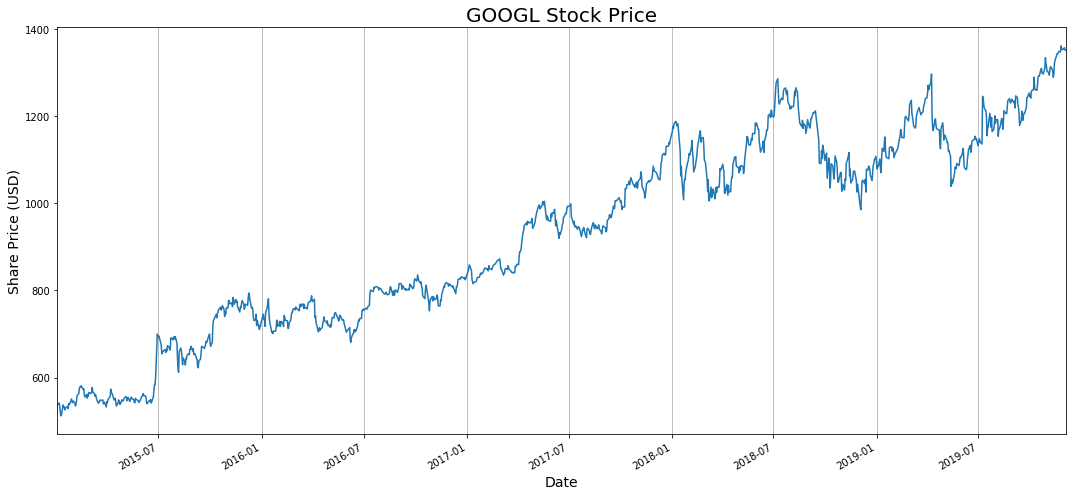

In [93]:
graph = df['label'].plot()

# Set graph labels and titles 
graph.set_xlabel('Date', fontsize=14)
graph.set_ylabel('Share Price (USD)', fontsize=14)
graph.set_title(f'{company} Stock Price', fontsize=20)

plt.rcParams['figure.figsize'] = [15, 7]  # Set size of graph 
plt.grid(axis='x')  # Add grid lines on the x axis
plt.tight_layout()
plt.show()

In [94]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])
X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

f'The confidence level is: {confidence}'

'The confidence level is: 0.9622783576444761'